# Military Aircraft Classification

You can find the dataset at the following url: https://zenodo.org/record/3464319#.YUiSrrgzaUk) In general, MTARSI images are remote sensing images acquired from satellite images available on the Internet. 

In [1]:
# !pip install tensorflow

In [7]:
#import packages
import os
import numpy as np
import glob
import shutil

import tensorflow as tf
import tensorflow.keras as keras 
import tensorflow.keras.layers as layers
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img # For image operations
from tensorflow.keras.models import Sequential # These are required for building our new model
from tensorflow.keras.layers import Dense # These are required for building our new model
from tensorflow.keras.applications.vgg16 import VGG16  # The Transfer Learning model to be used in this project...
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image # Python Imaging Library - For operations like: Image open, resize image, etc..
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Tensorflow version
tf.__version__

'2.3.0'

In [10]:
tf.test.gpu_device_name()

''

In [11]:
# First we will define our train and test image paths...
train_files_path = "airplanedataset/Train/"
test_files_path = "airplanedataset/Test/"

# Let's load any airplane image from our dataset..
img = load_img(test_files_path + "B-52/3-1.jpg")

In [12]:
# What is the size?
print(img_to_array(img).shape)

(230, 266, 3)


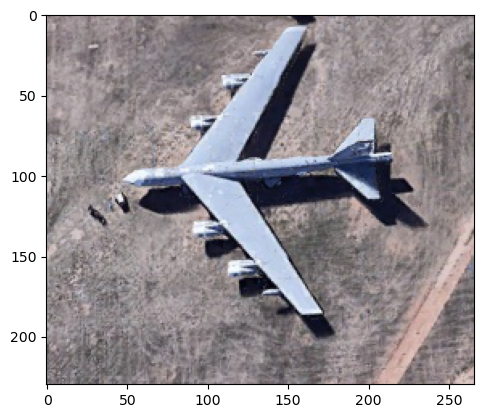

In [13]:
# Let's see this airplane, check if we can see it correctly?
plt.imshow(img)
plt.show()

### Test and Train datasets

In [14]:
# Let's build our train and test datasets from the directories of airplane images..
train_data = ImageDataGenerator().flow_from_directory(train_files_path,target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_files_path,target_size = (224,224))


Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [15]:
numberOfAirplaneTypes = 5  # If you have added other planes types (with airplane images in directories of course)
                           # then you must change this number...

## Building the Model 

In [16]:
# VGG16 pre-trained complex deep learning model
vgg = VGG16()

In [17]:
vgg_layers = vgg.layers
print(vgg_layers)

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x0000028001D80CC0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000028003FDEDA0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000028004008160>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000028004008860>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002800405B0B8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002800405BEF0>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000028004064898>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000028004064A90>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002800406E978>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002800406E9E8>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x00000280040769B0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000280

In [21]:
# For this I define vggmodel_layersize_tobe_used = len(vgg_layers) - 1 (minus 1 means I omit the last layer - the output layer)
vggmodel_layersize_tobe_used = len(vgg_layers) - 1

model = Sequential()
for i in range(vggmodel_layersize_tobe_used):
    model.add(vgg_layers[i]) 

In [22]:
# used VGG model has good train parameters
for layers in model.layers:
    layers.trainable = False
model.add(Dense(numberOfAirplaneTypes, activation="softmax"))
#print model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [23]:
# Compile Model
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])
#set batch size
batch_size = 50

In [ ]:
# with tf.device('GPU:0'):
history = model.fit(train_data, steps_per_epoch=1600//batch_size, epochs= 10, validation_data=test_data, validation_steps= 800//batch_size)

Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 0.9079 - accuracy: 0.7246

W0226 16:11:24.200282 15768 data_adapter.py:1182] Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 16 batches). You may need to use the repeat() function when building your dataset.


32/32 [==============================] - 80s 2s/step - loss: 0.9079 - accuracy: 0.7246 - val_loss: 0.6993 - val_accuracy: 0.7900
Epoch 2/10
32/32 [==============================] - 66s 2s/step - loss: 0.1949 - accuracy: 0.9318
Epoch 3/10
32/32 [==============================] - 69s 2s/step - loss: 0.0993 - accuracy: 0.9648
Epoch 4/10
32/32 [==============================] - 69s 2s/step - loss: 0.0879 - accuracy: 0.9723
Epoch 5/10
32/32 [==============================] - 67s 2s/step - loss: 0.0516 - accuracy: 0.9842
Epoch 6/10
32/32 [==============================] - 65s 2s/step - loss: 0.0398 - accuracy: 0.9881
Epoch 7/10
29/32 [==========================>...] - ETA: 6s - loss: 0.0284 - accuracy: 0.9892

In [ ]:
# print average values
print("Average train loss: ", np.average(history.history['loss']))
print("Average train accuracy: ", np.average(history.history['accuracy']))
print("Average train val_loss: ", np.average(history.history['val_loss']))
print("Average train val_accuracy: ", np.average(history.history['val_accuracy']))

In [ ]:
#save model
model.save('military_aircraft_cs_tensorflows.h5')

In [ ]:
# model.save('militaryairclass_gpu_model.keras')
# Recreate the exact same model, including its weights and the optimizer
    # new_model = ts.keras.models.load_model('mac_model.h5')
# Show the model architecture
    # new_model.summary()
#https://www.tensorflow.org/tutorials/keras/save_and_load
# Save the weights
# model.save_weights('./checkpoints/military_checkpoint')
# Create a new model instance
# model = create_model()
# Restore the weights
# model.load_weights('./checkpoints/mac_checkpoint')
# Evaluate the model
# oss, acc = model.evaluate(test_images, test_labels, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100 * acc))
# restore the weights
# model.load_weights('./checkpoints/military_checkpoint')
# save the model
# model.save('military_air_model')

In [ ]:
# Plot Training and Validation Graphs one cpu.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', linewidth=2, color="blue")
plt.plot(epochs_range, val_acc, label='Validation Accuracy', linewidth=2, color="red")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy \n (TF+Keras+CPU(MiniConda))')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', linewidth=2, color="blue")
plt.plot(epochs_range, val_loss, label='Validation Loss', linewidth=2, color="red")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss \n (TF+Keras+CPU(MiniConda))')
plt.savefig('CPUMConda.png')
plt.show()

## Testing model

In [48]:
# Let's load an aircraft image and rescale it to the resolution of 224x224 which VGG16 requires..
img = Image.open("f22.jpg").resize((224,224))

In [49]:
# We must convert it to array for operations...
img = np.array(img)

In [50]:
# Let's look it's shape..
img.shape

(224, 224, 3)

In [51]:
print(img.ndim)

3


In [52]:
# We have to add an extra dimension to our array so we will reshape it.. 
img = img.reshape(-1,224,224,3)   # with reshape(-1,..) I'm adding 1 extra dimension..
                                  # I do this because my model requires 4 dim array!

In [53]:
# Let's look it's shape..
print(img.shape)
print(img.ndim)

(1, 224, 224, 3)
4


In [54]:
# I will scale input pixels between -1 and 1 using my model's preprocess_input
# VGG16 model requires it..
img = preprocess_input(img)   

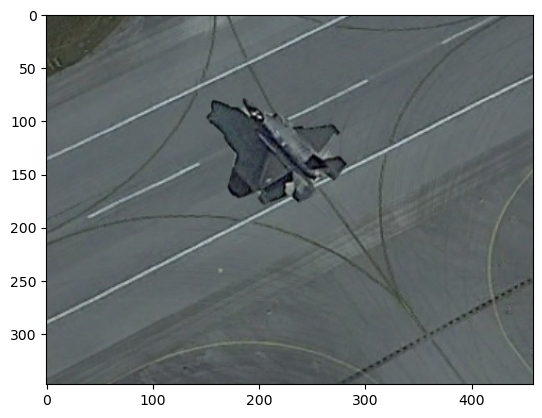

In [55]:
# Let's see the aircraft..
img_for_display = load_img("f22.jpg")
plt.imshow(img_for_display)
plt.show()

## Model Prediction

In [56]:
preds = model.predict(img)


1/1 [==============================] - 0s 104ms/step


In [57]:
# Let's see contents of prediction array.. 
preds

array([[7.4770014e-07, 1.2618572e-09, 1.8114552e-08, 9.9999928e-01,
        6.4732735e-09]], dtype=float32)

These are the possibilities of each output (one-hot encoding)

In [40]:
image_classes = ["A-10 Thunderbolt","Boeing B-52","Boeing E-3 Sentry","F-22 Raptor","KC-10 Extender"]

result = np.argmax(preds[0])
print(image_classes[result]) 

F-22 Raptor
